# Optimization with the Clonal Selection Algorithm (CLONALG)

## 1. Introduction

### Rastrigin Function - Example of Continuous Optimization

In this notebook, we apply **ClonAlg** to the **Rastrigin Function**, a classic continuous optimization problem
using optimization algorithms from the **AISP** package.

The Rastrigin function is a multimodal, non-convex function with many local minima,
making it an excellent benchmark for optimization algorithms. The function is defined as:

**f(x) = 10n + Σ\[i=1 to n] (xᵢ² - 10cos(2πxᵢ))**

Where:

* **n** is the problem dimension
* **xᵢ** ∈ \[−5.12, 5.12] for each dimension
* **Global minimum**: f(0,0) = 0

## 2. Setup

### Installation of the required libraries.

In [ ]:
%pip install matplotlib
%pip install aisp

### Import of the required libraries

In [1]:
# Importing the Clonal Selection Algorithm (CLONALG)
from aisp.csa import Clonalg

# Libraries for data manipulation and numerical calculations
import numpy as np

# Data visualization
import matplotlib.pyplot as plt

## 3. Problem Definition

In [2]:
# Problem setup
problem_size = 2
bounds = {'min': -5.12, 'max': 5.12}

def rastrigin_fitness(x: np.ndarray) -> np.float64:
    x = np.clip(x, bounds['min'], bounds['max'])
    
    n = len(x)
    result = 10 * n
    for i in range(n):
        result += x[i]**2 - 10 * np.cos(2 * np.pi * x[i])
    return np.float64(result)

## 4. Algorithm configuration

In [3]:
# Optimized ClonAlg configuration for Rastrigin function
clonalg = Clonalg(
    problem_size=problem_size,
    N=50,
    selection_size=15,
    rate_clonal=10,
    rate_hypermutation=0.3,
    n_diversity_injection=15,
    bounds=bounds,
    seed=1234
)

# Register the fitness function
clonalg.register('affinity_function', rastrigin_fitness)


## 5. Running the optimization

In [4]:
clonalg.optimize(100, 3)

if clonalg.best_cost is not None:
	print('Best cost:', abs(clonalg.best_cost))


┌───────────┬─────────────────────────┬────────────────────┬─────────────────┐
│ Iteration │   Best Affinity (min)   │   Worse Affinity   │   Stagnation    │
├───────────┼─────────────────────────┼────────────────────┼─────────────────┤
│     1     │                 7.153385│           76.021342│        0        │
│     2     │                 0.000000│           33.315827│        0        │
│     3     │                 0.000000│           30.948129│        1        │
│     4     │                 0.000000│           31.998642│        2        │
│     5     │                 0.000000│           56.071764│        3        │
└───────────┴─────────────────────────┴────────────────────┴─────────────────┘
Total time: 0.013041 seconds
Best cost: 0.0


## 6. Resultado

In [5]:
print(clonalg.get_report())


            Optimization Summary             
Best cost      : 0.0
Best solution  : [6.23054972e-307 7.56593696e-307]
Cost History per Iteration:

┌────────────┬────────────────────────────┐
│ Iteration  │            Cost            │
├────────────┼────────────────────────────┤
│          1 │                   7.153385 │
│          2 │                   0.000000 │
│          3 │                   0.000000 │
│          4 │                   0.000000 │
│          5 │                   0.000000 │
└────────────┴────────────────────────────┘


### 6.1 Evolution of the best over generations

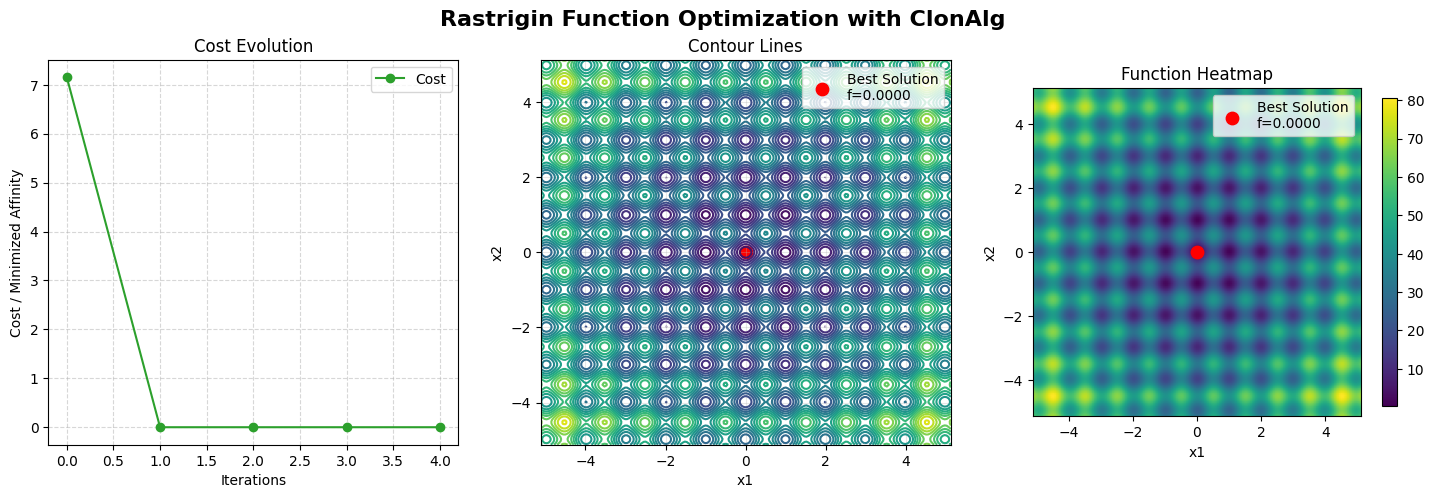

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare Rastrigin function data (mesh for visualization)
x1 = np.linspace(bounds['min'], bounds['max'], 200)
x2 = np.linspace(bounds['min'], bounds['max'], 200)
X, Y = np.meshgrid(x1, x2)
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = rastrigin_fitness(np.array([X[i, j], Y[i, j]]))

# Best solution from ClonAlg
best_solution = clonalg.best_solution
best_cost = clonalg.best_cost

fig = plt.figure(figsize=(18, 5))

# Cost evolution plot
ax1 = fig.add_subplot(131)
costs = np.array(clonalg.cost_history)

ax1.plot(costs, marker='o', color='tab:green', label='Cost')

ax1.set_title('Cost Evolution', fontsize=12)
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost / Minimized Affinity')
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend()

# Contour plot
ax2 = fig.add_subplot(132)
contour = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
if best_solution is not None:
    ax2.scatter(best_solution[0], best_solution[1], color='red', s=80,
                label=f'Best Solution\nf={best_cost:.4f}')
    ax2.legend()
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.grid(True, alpha=0.3)
ax2.set_title('Contour Lines')

# Heatmap
ax3 = fig.add_subplot(133)
im = ax3.imshow(Z, extent=(bounds['min'], bounds['max'], bounds['min'], bounds['max']),
                origin='lower', cmap='viridis')
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_title('Function Heatmap')
plt.colorbar(im, ax=ax3, shrink=0.8)

# Mark best solution on the heatmap
if best_solution is not None:
    ax3.scatter(best_solution[0], best_solution[1], color='red', s=80,
                label=f'Best Solution\nf={best_cost:.4f}')
    ax3.legend()

fig.suptitle('Rastrigin Function Optimization with ClonAlg',
             fontsize=16, fontweight='bold')
plt.show()